In [187]:
# import gym
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt 
import gymnasium as gym
np.random.seed(0)

In [188]:
def plot_Q(Q):
    plt.figure(figsize=(10, 10))  # Adjust the size as needed
    plt.imshow(Q, cmap='cool', interpolation='nearest')
    plt.title('Q-value Table')
    plt.colorbar(label='Q-value')
    # Display numerical values in each cell
    for i in range(n_states):
        for j in range(n_actions):
            plt.text(j, i, f'{Q[i, j]:.2f}', ha='center', va='center', color='black')
    plt.show()

In [189]:
def success_rate(env, Q, max_steps):   
    episodes = 100
    nb_success = 0
    # Evaluation
    for _ in range(episodes):
        state, _ = env.reset()
        done = False
        current_step = 0
        # Until the agent gets stuck or reaches the goal, keep training it
        while not done:
            # Choose the action with the highest value in the current state
            action = np.argmax(Q[state])

            # Implement this action and move the agent in the desired direction
            new_state, reward, done, info, _ = env.step(action)

            # Update our current state
            state = new_state
            current_step += 1
            # When we get a reward, it means we solved the game
            nb_success += reward
            if current_step == max_steps:
                break

    # Let's check our success rate!
    print (f"Success rate = {nb_success/episodes*100}%")
    return nb_success/episodes*100

In [190]:
# Environment setup
env = gym.make('FrozenLake-v1', is_slippery=True)
n_states = env.observation_space.n
n_actions = env.action_space.n


In [191]:
#hyper-parameters:
alpha = 0.2
gamma = 0.95
n_episodes = 5000
max_steps = 100
init_epsilon=1.0
min_epsilon=0.05
decay_ratio=0.9



In [192]:
def Q_learning(env, alpha, gamma, n_episodes, max_steps, init_epsilon, min_epsilon, decay_ratio):
    # Q-value initialization
    Q = np.zeros((n_states, n_actions))
    steps = []
    returns = []
    decay_over_episodes = n_episodes * decay_ratio
    for e in tqdm(range(n_episodes)):
        #print("episode ", e)
        rewards = 0
        state, _ = env.reset()
        done = False
        current_step = 0
        # epsilon = max(init_epsilon * decay_ratio, min_epsilon)
        epsilon = min_epsilon + (init_epsilon - min_epsilon)*np.exp(-decay_ratio*e) 
        while current_step < max_steps:
            if np.random.uniform() > epsilon:
                action = np.argmax(Q[state,:])
            else:
                action = np.random.choice(n_actions)
            next_state, reward, done, _ , _= env.step(action)

            if done:
                target = reward
            else:
                target = reward + gamma * Q[next_state].max()

                
            Q[state][action] = (1-alpha) * Q[state][action] + alpha * target
            state = next_state
            rewards += reward
            current_step += 1
            if (not done) and (current_step == 100):
                steps.append(100)
            if done:
                if reward:
                    steps.append(current_step)
                else:
                    steps.append(100)
                break
        returns.append(rewards)
        if e == 500 or e == 2000:
            print(f'Q-table after {e} episodes')
            plot_Q(Q)

    print(f'Final Q-table')
    plot_Q(Q)
    return Q, returns, steps
            



  5%|▌         | 255/5000 [00:00<00:03, 1246.69it/s]

  8%|▊         | 380/5000 [00:00<00:03, 1231.75it/s]

Q-table after 500 episodes


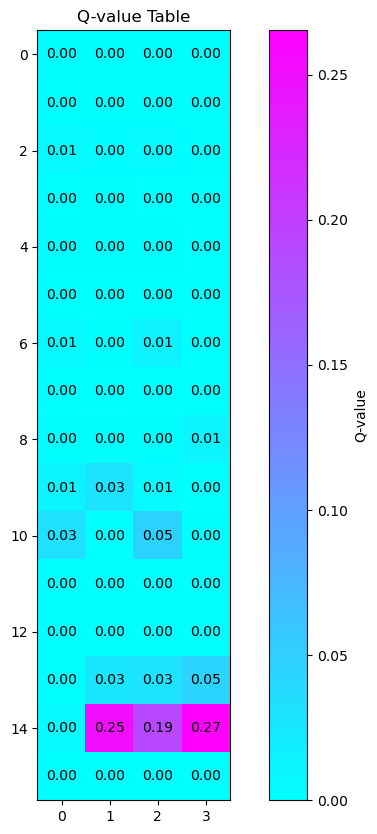

 38%|███▊      | 1921/5000 [00:02<00:03, 791.04it/s]

Q-table after 2000 episodes


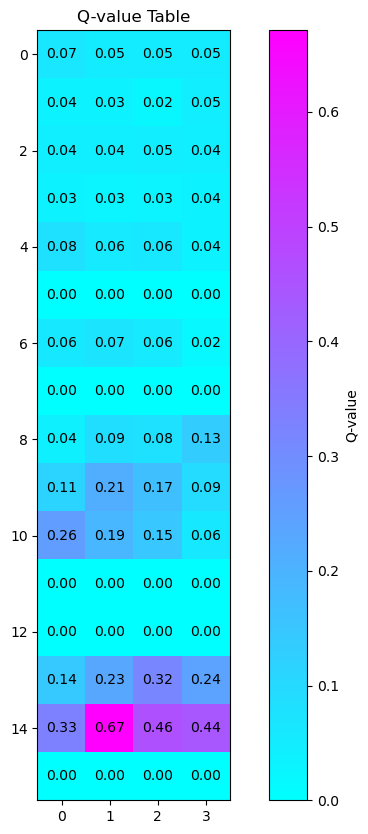

100%|██████████| 5000/5000 [00:09<00:00, 552.25it/s]


Final Q-table


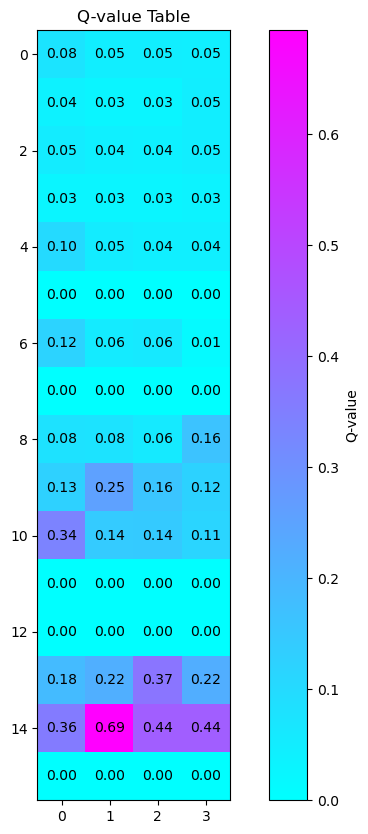

Success rate = 74.0%


74.0

In [193]:
Q, returns, steps = Q_learning(env, 0.1, 0.9, n_episodes, max_steps, 1.0, 0.01, 0.001)
success_rate(env, Q, max_steps)


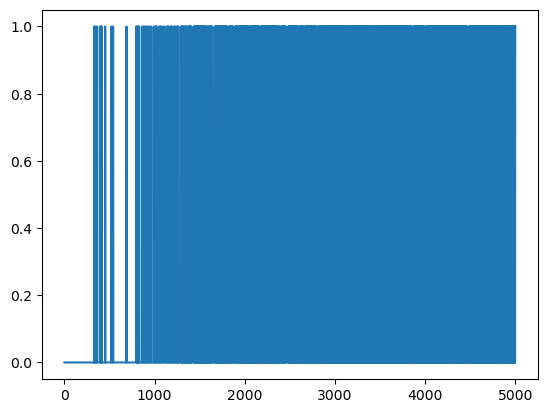

In [194]:
import matplotlib.pyplot as plt
plt.plot(returns)

In [195]:
len(steps)

5000

In [196]:
avg_list = [np.mean(steps[i * 100 :(i + 1) * 100]) for i in range(50)]

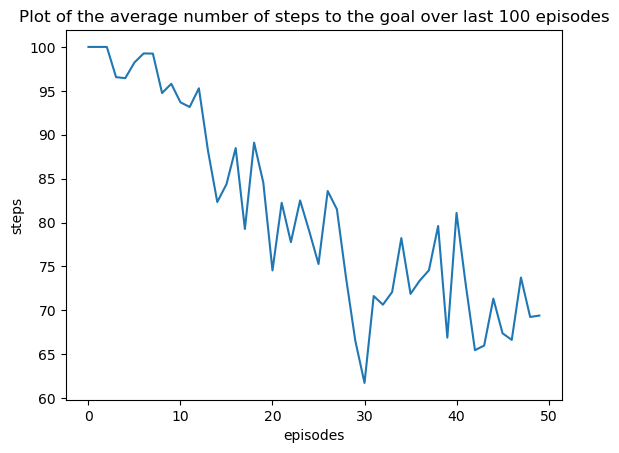

In [197]:
plt.title("Plot of the average number of steps to the goal over last 100 episodes")
plt.xlabel("episodes")
plt.ylabel("steps")
plt.plot(avg_list)